# How to Calculate Confidence Levels and Best Value of Paramters

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats

import os
import subprocess
import IPython.core.magic 

import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib as ml
import matplotlib.lines as lin
plt = ml.pyplot


In [2]:
from IPython.core.magic import register_line_magic

@register_line_magic
def shorterr(line):
    """Show only the exception message if one is raised."""
    try:
        output = eval(line)
    except Exception as e:
        print("\x1b[31m\x1b[1m{e.__class__.__name__}: {e}\x1b[0m".format(e=e))
    else:
        return output
    
del shorterr

## Importing data and making DataFrame

In [3]:

cwd=os.getcwd()
path_data=cwd+'/data/Supernova-chain-50000.txt'

data=np.genfromtxt(path_data)
df=pd.DataFrame(data)

# Eliminating some extra columns 
# df.columns=[ 'ones', 'zeros' ,r'$\Omega_m$', 'w', 'chi']
df.columns=[ 'ones', 'zeros' ,'Omega_m', 'w', 'chi']
df=df.drop(['ones', 'zeros'], axis=1)
df

,Omega_m,w,chi
0,0.300273,-1.027751,1035.204512
1,0.300292,-1.030235,1035.082275
2,0.300292,-1.030235,1035.082275
3,0.297573,-1.027665,1035.031167
4,0.286297,-1.032088,1035.376073
...,...,...,...
49995,0.341082,-1.249296,1033.655570
49996,0.341914,-1.245089,1033.331768
49997,0.341914,-1.245089,1033.331768
49998,0.344221,-1.249376,1033.126465


## We plot data, begining from minimun of "omega_m" and "w" column which is best value of parameters

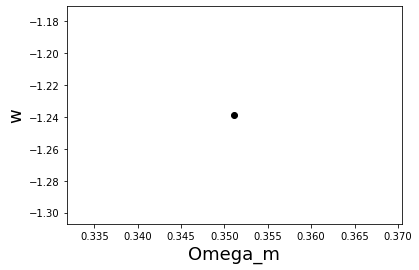

In [4]:
first_spot=df.iloc[df[['chi']].idxmin()] # We Need ID of Minimum  Point
fp=pd.DataFrame(first_spot)

# Then We Form Parameter Space and Plot "omega_m" and "w" Columns of Minimum  Point

plt.plot( fp['Omega_m'], fp['w'], 'ko' )
plt.xlabel('Omega_m', fontsize = 18);
plt.ylabel('w', fontsize = 18);


## Best value of parameters can be calculates with mean formnula


$$
\overline {\theta_{0}}= 1/N \sum_{i=0}^{N}  \theta_{0}^{(i)}
$$

which N is the number of chains (here is 5000) and theta is our free paramter 

In [5]:

data=[df['Omega_m'].mean(), df['w'].mean()]

best= pd.DataFrame(data, ['Omega_m', 'w'])
best= best.T
best

,Omega_m,w
0,0.356314,-1.274603


## We import data again to plot 1$\sigma$, 2$\sigma$ and 3$\sigma$ confidence levels

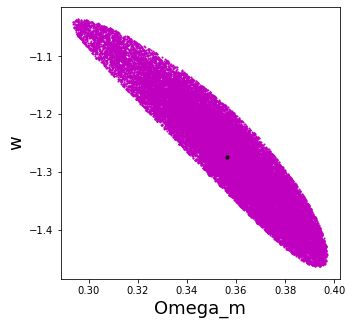

In [6]:

cwd = os.getcwd()
path_data = cwd+'/data/Supernova-chain-50000.txt'

data = np.genfromtxt(path_data)
da = pd.DataFrame(data)
da.columns = [ 'ones', 'zeros' ,'Omega_m', 'w', 'chi']
da = da.drop(['ones', 'zeros'], axis =1)

# Forming Subsample_1 to Plot data in 1sigma confidence level (for n= 2 & CL= 68.27%, limit line of 1 sigma CL is chi-chi(min)<2.3)
sbs_1 = da[da.chi-(da['chi'].min()) < 2.3]

plt.rcParams["figure.figsize"] = (5,5)

a= sbs_1['Omega_m']
b= sbs_1['w']

plt.plot(a, b,  'mo', markersize = 1)
plt.plot(best['Omega_m'], best['w'], 'ko', markersize=3)
plt.xlabel('Omega_m', fontsize = 18);
plt.ylabel('w', fontsize = 18);

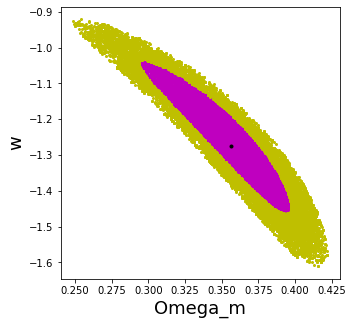

In [7]:
# Forming Subsample_2 to Plot data in 2sigma confidence level (for n= 2 & CL= 68.27%, limit line of 2sigma CL is 2.3<chi-chi(min)<6.17)
sbs_2=da[(da.chi - (da['chi'].min()) < 6.17)  &  (2.3 < da.chi - (da['chi'].min()))]


plt.rcParams["figure.figsize"] = (5,5)


plt.plot(sbs_1['Omega_m'], sbs_1['w'], 'mo', markersize = 1)
plt.plot(sbs_2['Omega_m'], sbs_2['w'], 'yo', markersize = 2)
plt.plot(best['Omega_m'], best['w'], 'ko', markersize=3)


plt.xlabel('Omega_m', fontsize =18);
plt.ylabel('w', fontsize =18);

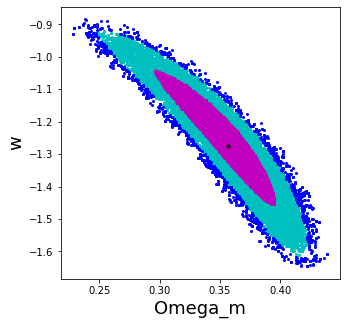

In [8]:
# Forming Subsample_2 to Plot data in 2sigma confidence level (for n= 2 & CL= 68.27%, limit line of 2sigma CL is 6.17<chi-chi(min)<11.8)
sbs_3 = da[(da.chi - (da['chi'].min()) < 11.8)  &  (6.17 < da.chi - (da['chi'].min()))]



plt.plot(sbs_1['Omega_m'], sbs_1['w'], 'mo', markersize = 1)
plt.plot(sbs_2['Omega_m'], sbs_2['w'], 'co', markersize = 2)
plt.plot(sbs_3['Omega_m'], sbs_3['w'], 'bo', markersize = 2)
plt.plot(best['Omega_m'], best['w'], 'ko', markersize=3)

plt.xlabel('Omega_m', fontsize =18);
plt.ylabel('w', fontsize =18);

## ploting final confidence levels and Gaussian plots of parameters 

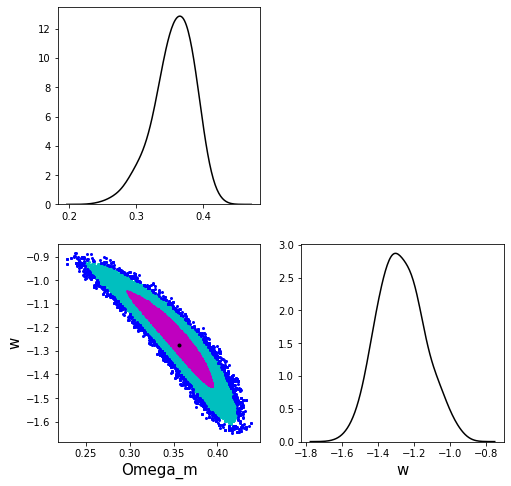

In [9]:
w=da['w']
om=da['Omega_m']


fig , axes= plt.subplots (nrows=2 , ncols=2, figsize=(8,8))

# Ploting everythin we have till now, on axes [1,0]
axes[1,0].plot(sbs_1['Omega_m'], sbs_1['w'], 'mo', markersize=1)
axes[1,0].plot(sbs_2['Omega_m'], sbs_2['w'], 'co', markersize=2)
axes[1,0].plot(sbs_3['Omega_m'], sbs_3['w'], 'bo', markersize=2)
axes[1,0].plot(best['Omega_m'], best['w'], 'ko', markersize=3)
axes[0,1].set_visible(False)


# Ploting Gaussian plot of parameter "w" on axes[1,1] and "omega_m" on axes[0,0]

#axes[1,1].hist(w, bins = 100, color='c', density=True);
ax= sns.kdeplot(w, color='k', bw_adjust=3, ax=axes[1, 1]);

# axes[0,0].hist(omega_m, bins = 100, color='c');
ax1=sns.kdeplot(om, color='k', bw_adjust=3, ax=axes[0,0]);



axes[1,1].set_xlabel('w', fontsize=15);
axes[1,0].set_ylabel('w', fontsize=15);
axes[1,0].set_xlabel('Omega_m', fontsize=15 );
axes[0,0].set_xlabel(' ');
axes[0,0].set_ylabel(' ');
axes[1,1].set_ylabel(' ');


plt.savefig('contours.eps', bbox_inches="tight", format='eps' )

# Calculation of $\sigma$  for parameters in three confidence levels

In [14]:
one_sigma_w = np.percentile(w, [16, 84])
one_sigma_om = np.percentile(om, [16, 84])

two_sigma_w = np.percentile(w, [2.5, 97.5])
two_sigma_om = np.percentile(om, [2.5, 97.5])

three_sigma_w = np.percentile(w, [0.5, 99.5])
three_sigma_om = np.percentile(om, [0.5, 99.5])

I= best['w']
g= best['Omega_m']

o_plus_w = (one_sigma_w [1] - best ['w']).values
o_minus_w = (one_sigma_w [0] - best ['w']).values
 

o_plus_om = (one_sigma_om [1] - best ['Omega_m']).values
o_minus_om = (one_sigma_om [0] - best ['Omega_m']).values

t_plus_w = (two_sigma_w [1] - best ['w']).values
t_minus_w = (two_sigma_w [0] - best ['w']).values

t_plus_om = (two_sigma_om [1] - best ['Omega_m']).values
t_minus_om = (two_sigma_om [0] - best ['Omega_m']).values

th_plus_w = (three_sigma_w [1] - best ['w']).values
th_minus_w = (three_sigma_w [0] - best ['w']).values

th_plus_om = (three_sigma_om [1] - best ['Omega_m']).values
th_minus_om = (three_sigma_om [0] - best ['Omega_m']).values


data={"err_p_om":[o_plus_om, t_plus_om, th_plus_om],
      "err_m_om":[o_minus_om, t_minus_om, th_minus_om],
      "err_p_w":[o_plus_w, t_plus_w, th_plus_w],
      "err_m_w":[o_minus_w, t_minus_w, th_minus_w],
      "best_value_w": [I],
      "best_value_omega": [g],
     }


bv_table = pd.DataFrame(data, index=['1"$\sigma$"', '2"$\sigma$"', '3"$\sigma$"'])

bv_table[' best_value_$\Omega$ ']=bv_table.best_value_omega.astype(float)
bv_table[' best_value_w ']=bv_table.best_value_w.astype(float)

bv_table[' om_plus_err ']=bv_table.err_p_om.astype(float)
bv_table[' om_minus_err ']=bv_table.err_m_om.astype(float)

bv_table[' w_plus_err ']=bv_table.err_p_w.astype(float)
bv_table[' w_minus_err ']=bv_table.err_m_w.astype(float)

bv_table = bv_table.drop(['best_value_omega', 'best_value_w', 'err_p_om', 'err_m_om', 'err_p_w', 'err_m_w'], axis=1)

bv_table= bv_table.round(decimals=3)
bv_table

# Saving DataFrame table as csv file
bv_table.to_csv('best_values.csv')

bv_table

,best_value_$\Omega$,best_value_w,om_plus_err,om_minus_err,w_plus_err,w_minus_err
"1""$\sigma$""",0.356,-1.275,0.030,-0.029,0.128,-0.129
"2""$\sigma$""",0.356,-1.275,0.050,-0.070,0.262,-0.233
"3""$\sigma$""",0.356,-1.275,0.062,-0.096,0.321,-0.294


## visualization of confidence levels on plots

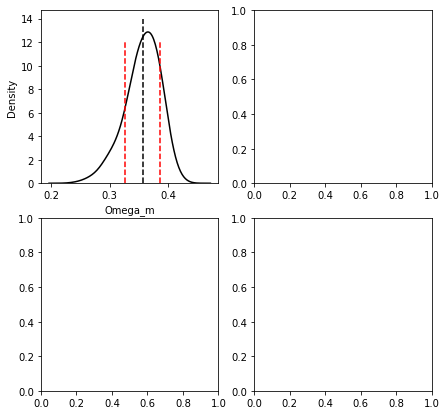

In [11]:


fig , axes= plt.subplots (nrows=2 , ncols=2, figsize=(7, 7))

          
ax1=sns.kdeplot(om, color='k', bw_adjust=3, ax=axes[0,0]);
mm_om= best ['Omega_m']
axes[0, 0].plot([mm_om]*2, [0, 14], 'k--' )
axes[0, 0].plot ([mm_om - o_plus_om ]*2, [0 , 12], 'r--');
axes[0, 0].plot ([mm_om - o_minus_om]*2, [0 , 12], 'r--');

# ax2= sns.kdeplot(w, color='k', bw_adjust=3, ax=axes[1, 1]);
# # mm_w= best ['w']
# # axes[1, 1].plot ([mm_w - o_plus_w]*2, [0 , 4], 'r--')
# # axes[1, 1].plot ([mm_w - o_minus_w]*2, [0 , 4], 'r--')

## Now we can save the results as a table

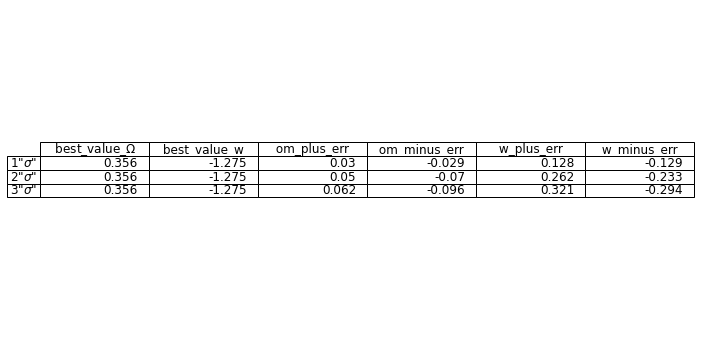

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import numpy as np



fig, ax = plt.subplots(figsize=(10, 6)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok

tabla = table(ax, bv_table, loc='center', colWidths=[0.17]*len(bv_table.columns))  # where bv_table is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.15,1.15) # change size table


# Saving DataFrame table as figure 
plt.savefig('table.png', transparent=True, facecolor="#FFFFFF")